In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
from matplotlib import style
style.use("ggplot")

import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [5]:
import pandas, sys
import pandas as pd


gold = pd.read_csv("/gold.csv")
eth = pd.read_csv("/etherium.csv")
dollar = pd.read_csv("/dollar.csv")
SP_500 = pd.read_csv("/S&P500.csv")

model_two_eth = pd.concat ([gold, eth, dollar, SP_500])

#model_two_eth.to_csv ("c:/Users/George Aziz/desktop/Final_Project/data/model_two_eth.csv", index=False)

model_two_eth.head()

FileNotFoundError: [Errno 2] File /gold.csv does not exist: '/gold.csv'

In [6]:
model_two_eth = pd.read_csv("model_two_eth.csv")



model_two_eth.shape

(5861, 10)

In [7]:
model_two_eth.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5575.000000,5575.000000,5575.000000,4316.000000,4316.000000,5.575000e+03
mean,1069.236294,1077.688707,1060.131557,571.414905,571.414905,2.989063e+09
std,1089.320164,1094.182998,1084.081198,609.543372,609.543372,5.714270e+09
min,6.800000,7.320000,5.980000,6.820000,6.820000,0.000000e+00
25%,97.950000,98.200000,97.765000,96.300000,96.300000,1.100000e+01
50%,538.260000,551.640000,515.270000,211.435000,211.435000,3.166700e+07
75%,1835.325000,1850.900000,1822.350000,1246.325000,1246.325000,3.705885e+09
max,3973.590000,3994.410000,3966.980000,2051.500000,2051.500000,6.073363e+10


In [8]:
model_two_eth.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Ticker',
       'Close*', 'Adj Close**'],
      dtype='object')

In [9]:
model_two_eth = model_two_eth.drop ('Date', axis=1)

In [10]:
model_two_eth = model_two_eth.drop ('Close*', axis=1)

In [11]:
model_two_eth = model_two_eth.drop ('Adj Close**', axis=1)

In [12]:
model_two_eth.head()

,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1232.3,1235.2,1209.2,1222.2,1222.2,1602.0,gold
1,1221.7,1222.3,1215.0,1218.0,1218.0,2038.0,gold
2,1215.4,1236.7,1215.4,1228.4,1228.4,477.0,gold
3,1230.4,1230.4,1217.6,1222.5,1222.5,248.0,gold
4,1224.8,1242.9,1224.6,1236.2,1236.2,375.0,gold


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
model_two_eth_le = model_two_eth

model_two_eth_le.Ticker = le.fit_transform(model_two_eth_le.Ticker)

model_two_eth.le

<bound method _flex_comp_method_FRAME.<locals>.f of          Open     High      Low   Close  Adj Close        Volume  Ticker
0     1232.30  1235.20  1209.20  1222.2     1222.2  1.602000e+03       3
1     1221.70  1222.30  1215.00  1218.0     1218.0  2.038000e+03       3
2     1215.40  1236.70  1215.40  1228.4     1228.4  4.770000e+02       3
3     1230.40  1230.40  1217.60  1222.5     1222.5  2.480000e+02       3
4     1224.80  1242.90  1224.60  1236.2     1236.2  3.750000e+02       3
...       ...      ...      ...     ...        ...           ...     ...
5856  2063.01  2063.01  2033.80     NaN        NaN  3.801250e+09       0
5857  2045.56  2067.33  2043.09     NaN        NaN  3.750800e+09       0
5858  2062.50  2062.50  2042.56     NaN        NaN  4.154920e+09       0
5859  2073.19  2074.02  2062.57     NaN        NaN  3.485710e+09       0
5860  2056.62  2075.07  2043.98     NaN        NaN  3.749990e+09       0

[5861 rows x 7 columns]>

In [15]:
model_two_eth_le.fillna(model_two_eth_le.mean(), inplace=True)

In [16]:
X = model_two_eth_le.drop("Ticker", axis=1)
y = model_two_eth_le["Ticker"]
print(X.shape, y.shape)

(5861, 6) (5861,)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [19]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [21]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=6))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 11,204
Trainable params: 11,204
Non-trainable params: 0
_________________________________________________________________


In [26]:
finding = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
138/138 - 1s - loss: 0.7640 - accuracy: 0.6983
Epoch 2/100
138/138 - 0s - loss: 0.2990 - accuracy: 0.9163
Epoch 3/100
138/138 - 0s - loss: 0.2046 - accuracy: 0.9288
Epoch 4/100
138/138 - 0s - loss: 0.1365 - accuracy: 0.9791
Epoch 5/100
138/138 - 0s - loss: 0.0869 - accuracy: 0.9891
Epoch 6/100
138/138 - 0s - loss: 0.0596 - accuracy: 0.9923
Epoch 7/100
138/138 - 0s - loss: 0.0457 - accuracy: 0.9929
Epoch 8/100
138/138 - 0s - loss: 0.0384 - accuracy: 0.9936
Epoch 9/100
138/138 - 0s - loss: 0.0344 - accuracy: 0.9943
Epoch 10/100
138/138 - 0s - loss: 0.0341 - accuracy: 0.9939
Epoch 11/100
138/138 - 0s - loss: 0.0309 - accuracy: 0.9948
Epoch 12/100
138/138 - 0s - loss: 0.0289 - accuracy: 0.9943
Epoch 13/100
138/138 - 0s - loss: 0.0282 - accuracy: 0.9948
Epoch 14/100
138/138 - 0s - loss: 0.0289 - accuracy: 0.9945
Epoch 15/100
138/138 - 0s - loss: 0.0265 - accuracy: 0.9950
Epoch 16/100
138/138 - 0s - loss: 0.0256 - accuracy: 0.9950
Epoch 17/100
138/138 - 0s - loss: 0.0242 - accura

In [27]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")



46/46 - 0s - loss: 0.0184 - accuracy: 0.9959
Normal Neural Network - Loss: 0.018362192437052727, Accuracy: 0.9959072470664978


In [28]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [29]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:15])}")

Predicted classes: [2 2 1 3 2]
Actual Labels: [2, 2, 1, 3, 2, 1, 3, 2, 2, 3, 3, 2, 0, 2, 2]


In [30]:
def visualize_training_finding(finding):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = finding.history
    plt.figure(figsize=(12,4))
    
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Etherium Loss')
    plt.xlabel('Etherium Epochs')
    plt.ylabel('Etherium Loss')
    plt.show()
    
    plt.figure(figsize=(12,4))
    plt.plot(history['accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['model_loss', 'model_accuracy'])
    plt.title('Etherium Accuracy')
    plt.xlabel('Etherium Epochs')
    plt.ylabel('Etherium Accuracy')
    plt.show()

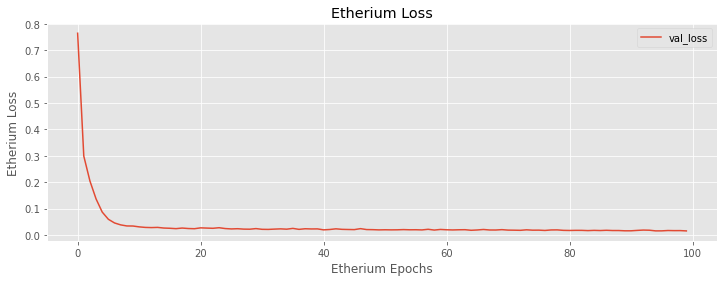

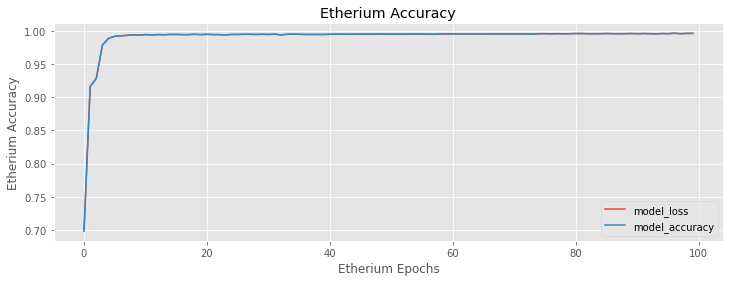

In [31]:
visualize_training_finding(finding)